In [1]:
include("IsingCore.jl")
using .IsingCore
using StochasticAD
using CairoMakie
using Optimisers
using LinearAlgebra
using Statistics: mean, std

println(names(IsingCore))

[:IsingCore, :calc_energy, :calc_mag, :independent_sampler, :initial_state, :ising_model, :ising_model_manyT, :ising_model_remc, :metropolis_sampler]


In [2]:
N = 12 # size of the lattice, N x N

T, E, M, C, X = @time IsingCore.ising_model_manyT(N, IsingCore.independent_sampler)

  2.280418 seconds (49.50 M allocations: 1.886 GiB, 11.91% gc time, 30.90% compilation time)


(0.05:0.2030612244897959:10.0, [-288.0, -288.0, -288.0, -288.0, -287.976, -287.376, -285.212, -281.416, -274.636, -264.504  …  -37.304, -36.236, -35.328, -32.264, -33.46, -32.72, -30.776, -29.952, -30.92, -28.16], [0.0069444444444445785, 0.0069444444444445785, 0.0069444444444445785, 0.0069444444444445785, 0.0069441550925927265, 0.006936921296296425, 0.006909047067901349, 0.006856577932098846, 0.0067587770061728804, 0.006594521604938272  …  0.0006141975308641953, 0.0006177662037037034, 0.0006255787037037033, 0.000577353395061728, 0.0005756172839506173, 0.0006012731481481472, 0.0005758101851851841, 0.000587866512345678, 0.0005626929012345678, 0.0005659722222222218], [0.0, 0.0, 0.0, 0.0, 0.25747503183225245, 4.3939769762733505, 14.273799072008378, 26.505422339522134, 43.303544286431816, 72.20303539507904  …  4.49984179325291, 4.100409159038493, 4.514361924041925, 3.7042161533638605, 3.7610831561877136, 3.633029288922581, 3.4342062084007634, 3.3605099979678172, 3.124834035391563, 3.0435840

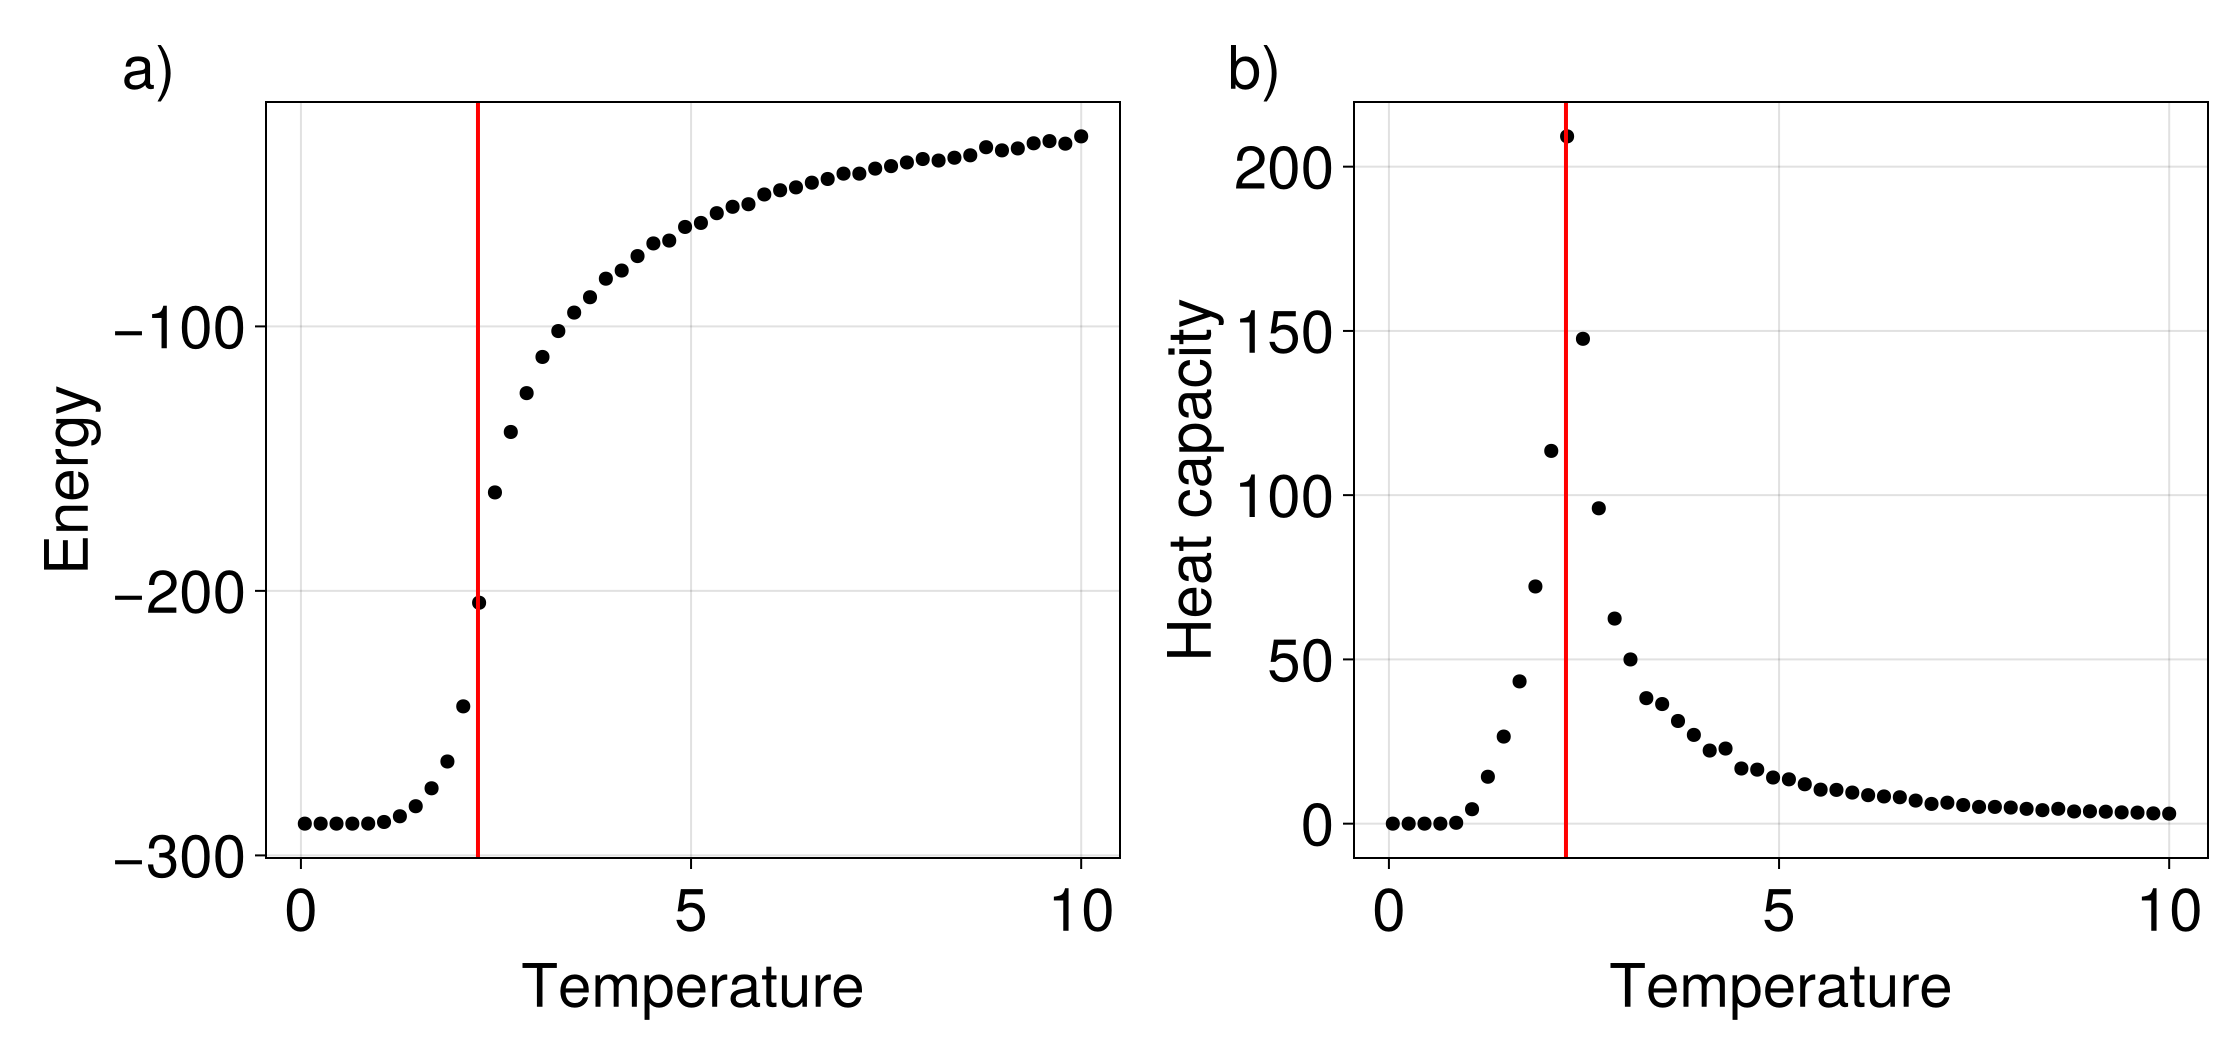

CairoMakie.Screen{IMAGE}


In [3]:
begin
    fig1 = Figure(size=(1120, 525), fontsize = 30)
    ax1 = fig1[1, 1] = Axis(fig1, xlabel="Temperature", ylabel="Energy")
    ax2 = fig1[1, 2] = Axis(fig1, xlabel="Temperature", ylabel="Heat capacity")
    Label(fig1[1, 1, TopLeft()], "a)");
    Label(fig1[1, 2, TopLeft()], "b)");

    T_crit = 2 / log(1 + sqrt(2))

    scatter!(ax1, T, E, color=:black, markersize=10)
    vlines!(ax1, T_crit, color=:red, linewidth=2)

    scatter!(ax2, T, C, color=:black, markersize=10)
    vlines!(ax2, T_crit, color=:red, linewidth=2)

    display(fig1)
end

In [5]:
T, E, M, C, X = @time IsingCore.ising_model_manyT(N, IsingCore.metropolis_sampler)

  2.109913 seconds (48.38 M allocations: 1.830 GiB, 23.84% gc time, 11.22% compilation time)


(0.05:0.2030612244897959:10.0, [-288.0, -288.0, -288.0, -287.988, -287.868, -287.248, -285.464, -281.876, -274.232, -261.652  …  -36.564, -35.424, -33.124, -35.108, -31.868, -32.32, -31.136, -31.336, -29.252, -30.128], [0.0069444444444445785, 0.0069444444444445785, 0.0069444444444445785, 0.006944251543210011, 0.006942804783950751, 0.006935185185185313, 0.006911844135802585, 0.006862461419753175, 0.006747685185185218, 0.006537712191358008  …  0.0006155478395061715, 0.0006083140432098764, 0.00061988811728395, 0.0005977044753086415, 0.0005966435185185177, 0.0006190200617283947, 0.0005918209876543199, 0.0005722415123456794, 0.0005595100308641969, 0.0005947145061728393], [0.0, 0.0, 0.0, 0.33106639191717446, 1.4615000740890784, 5.197475409940161, 14.242500348913245, 27.010562503543042, 49.93379693732561, 76.65240610775184  …  4.822145541403891, 4.206638781923403, 4.568338090725113, 3.844393052099426, 3.6830175564307255, 3.7907266724439173, 3.7021772747688724, 3.1231566534495667, 2.8851059487

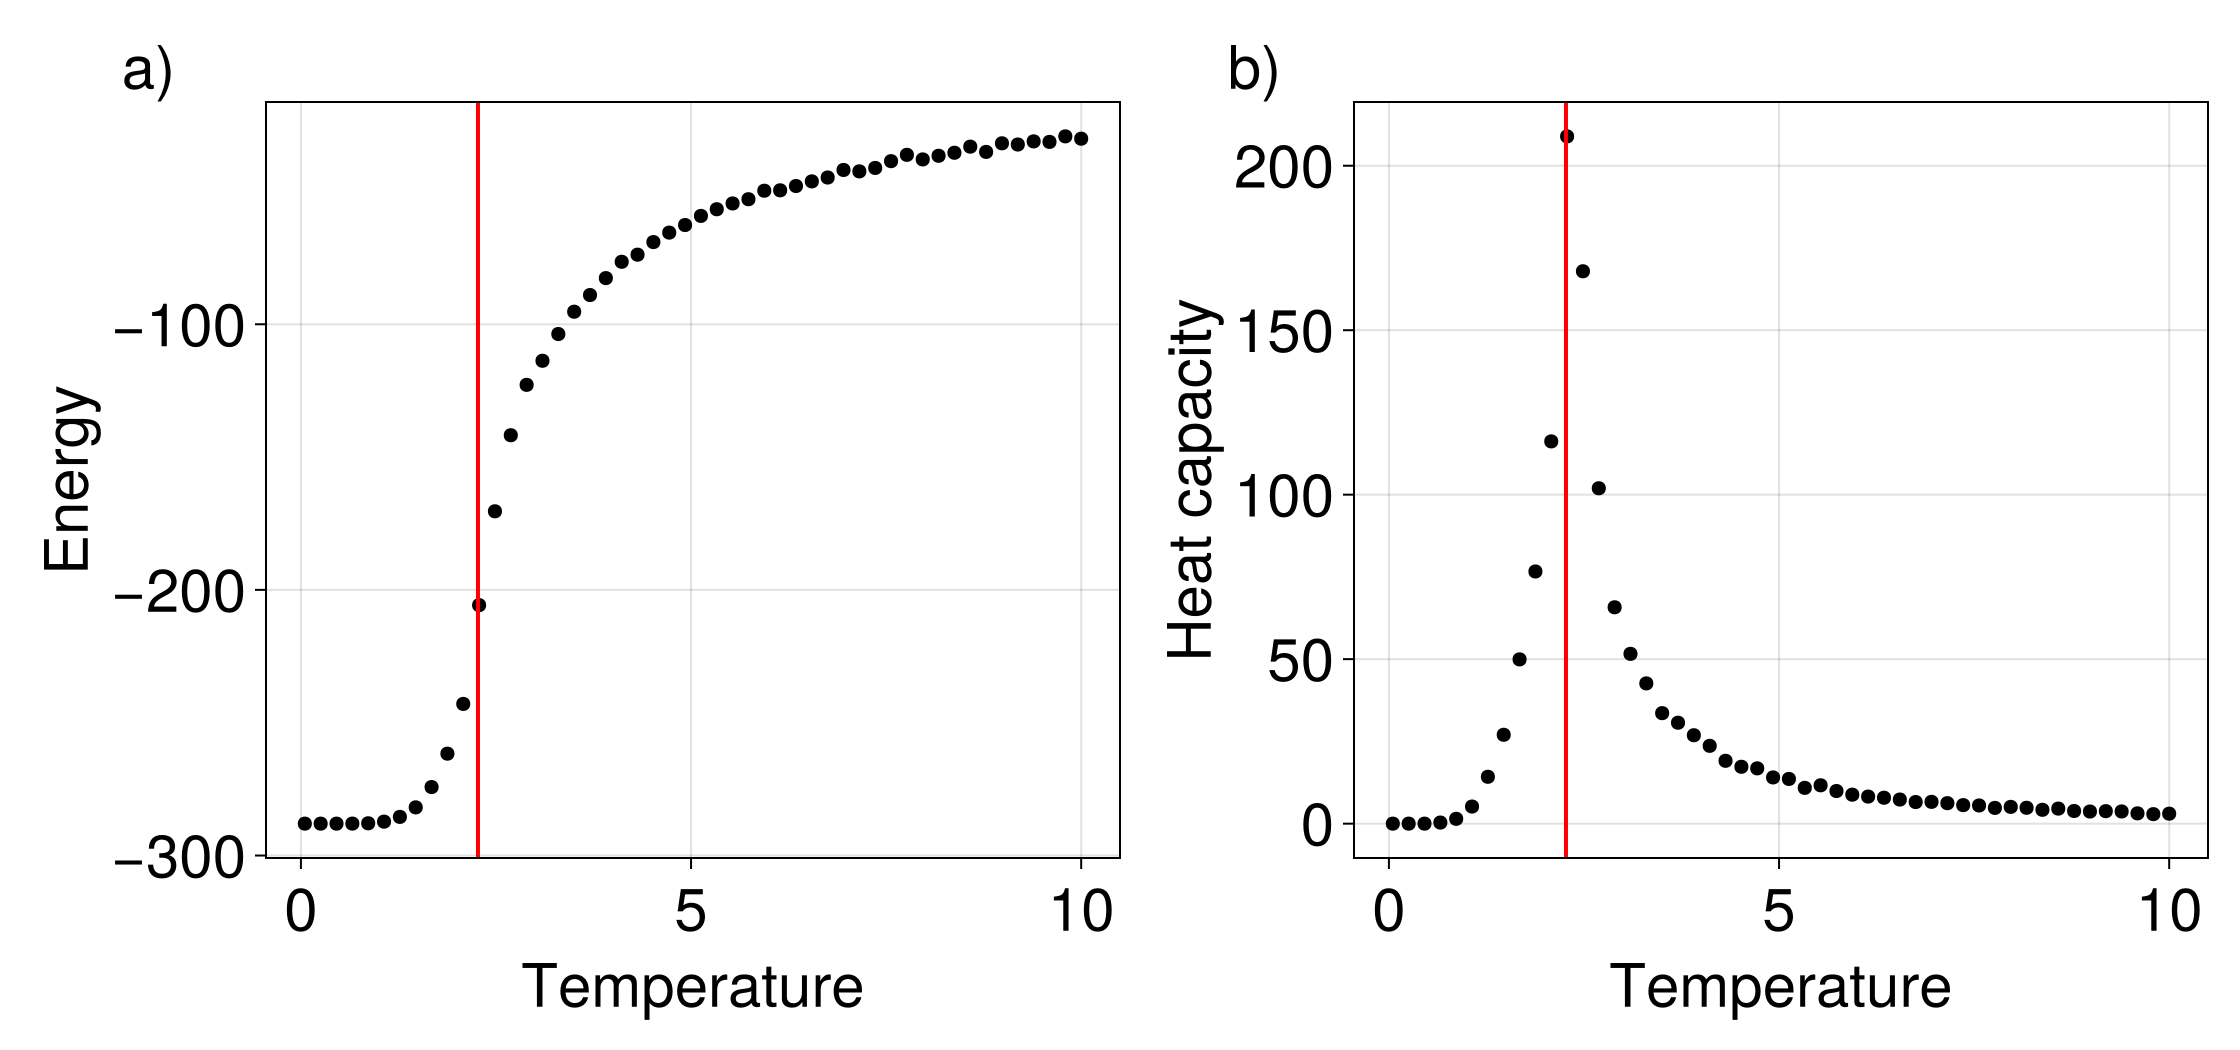

CairoMakie.Screen{IMAGE}


In [6]:
begin
    fig1 = Figure(size=(1120, 525), fontsize = 30)
    ax1 = fig1[1, 1] = Axis(fig1, xlabel="Temperature", ylabel="Energy")
    ax2 = fig1[1, 2] = Axis(fig1, xlabel="Temperature", ylabel="Heat capacity")
    Label(fig1[1, 1, TopLeft()], "a)");
    Label(fig1[1, 2, TopLeft()], "b)");

    T_crit = 2 / log(1 + sqrt(2))

    scatter!(ax1, T, E, color=:black, markersize=10)
    vlines!(ax1, T_crit, color=:red, linewidth=2)

    scatter!(ax2, T, C, color=:black, markersize=10)
    vlines!(ax2, T_crit, color=:red, linewidth=2)

    display(fig1)
end